The goal of palmerpenguins is to provide a great dataset for data exploration & visualization, as an alternative to iris.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [69]:
df = sns.load_dataset('penguins')

In [70]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [71]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [72]:
df.shape

(344, 7)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [74]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [75]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [76]:
# Data before imputation
print('Data before imputation')
df.head()

Data before imputation


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [77]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy = "mean")
mode_imputer = SimpleImputer(strategy = "most_frequent")

In [78]:
# Impute numerical features
num_feature_list     = list(df.select_dtypes(include = ['float64']).columns)
df[num_feature_list] = mean_imputer.fit_transform(df[num_feature_list])

# Impute categorical features
cat_feature_list     = list(df.select_dtypes(include = ['object']).columns)
df[cat_feature_list] = mode_imputer.fit_transform(df[cat_feature_list])

In [79]:
# Data after imputation
print('Data after imputation')
df.head()

Data after imputation


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [80]:
# from sklearn.preprocessing import LabelEncoder
cat_feature_list

['species', 'island', 'sex']

In [81]:
# One-Hot Encoding for the 'species', 'island' and 'sex' columns
df = pd.get_dummies(df, columns = cat_feature_list, drop_first = True)

In [82]:
df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_Male'],
      dtype='object')

In [83]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.10000,18.70000,181.000000,3750.000000,False,False,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,False,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,False,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,False,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,False,False,True,False


['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


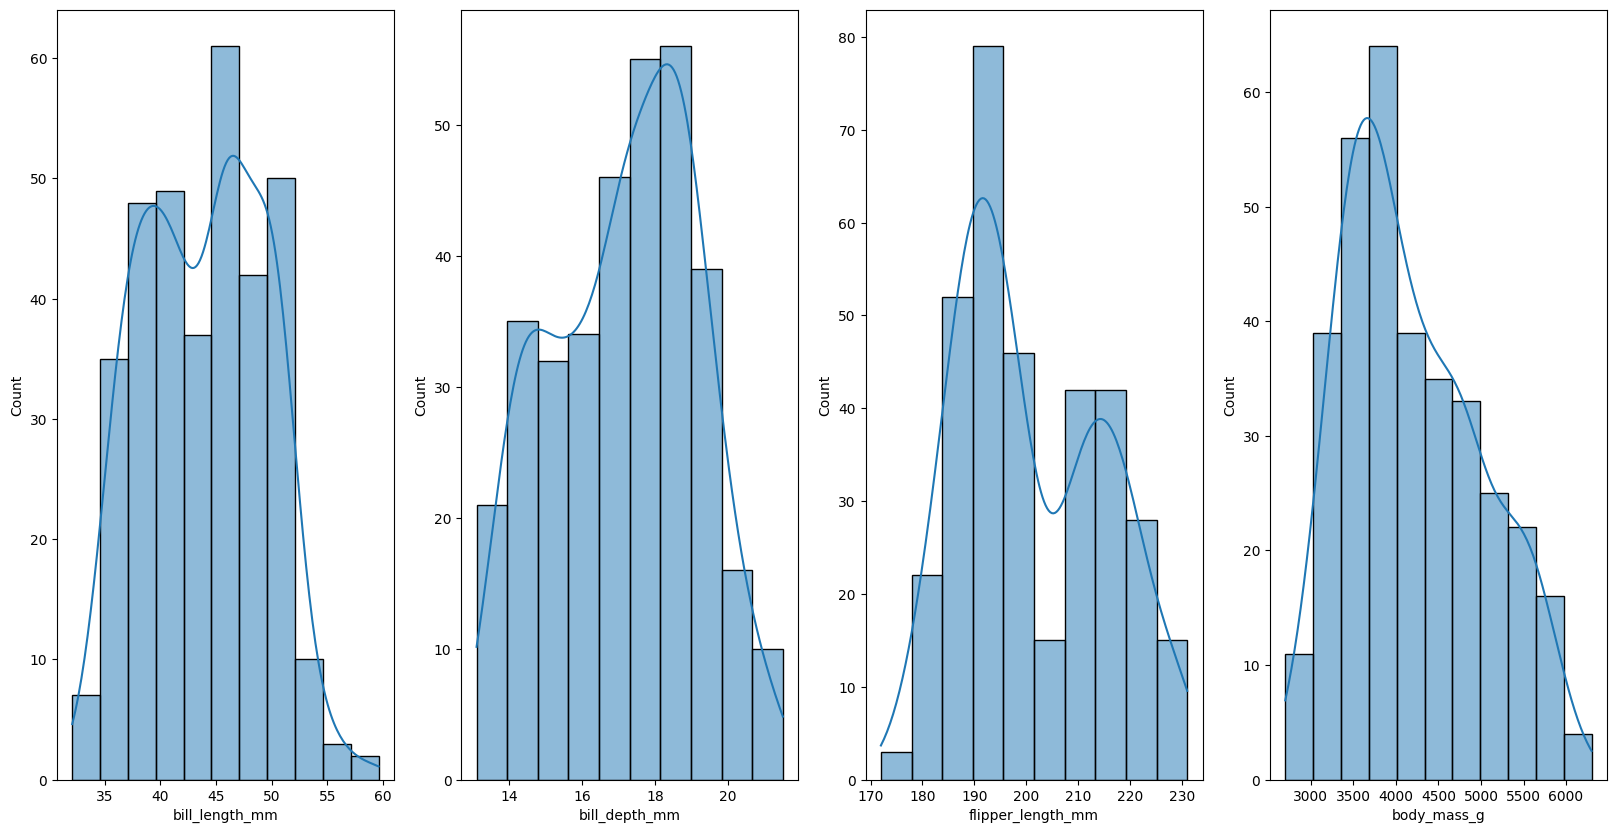

In [98]:
# Handle Outliers
print(num_feature_list)
count_num_feature_list = len(num_feature_list)
fig, axes = plt.subplots(1, count_num_feature_list, figsize = (20, 10))

for i, (ax, curve) in enumerate(zip(axes.flat, num_feature_list)):
    sns.histplot(df[curve], ax = ax, kde = True)

In [105]:
for label in num_feature_list:
    Q1 = df[label].quantile(0.25)
    Q3 = df[label].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]

In [106]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.10000,18.70000,181.000000,3750.000000,False,False,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,False,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,False,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,False,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,False,False,True,False


In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [111]:
min_max_scaler  = MinMaxScaler()
standard_scaler = StandardScaler()

df[['bill_length_mm_norm',
   'bill_depth_mm_norm',
   'flipper_length_mm_norm',
   'body_mass_g_norm']] = min_max_scaler.fit_transform(df[num_feature_list])

df[['bill_length_mm_std',
   'bill_depth_mm_std',
   'flipper_length_mm_std',
   'body_mass_g_std']] = standard_scaler.fit_transform(df[num_feature_list])

In [112]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male,bill_length_mm_norm,bill_depth_mm_norm,flipper_length_mm_norm,body_mass_g_norm,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std
0,39.10000,18.70000,181.000000,3750.000000,False,False,False,True,True,0.254545,0.666667,0.152542,0.291667,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,39.50000,17.40000,186.000000,3800.000000,False,False,False,True,False,0.269091,0.511905,0.237288,0.305556,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,40.30000,18.00000,195.000000,3250.000000,False,False,False,True,False,0.298182,0.583333,0.389831,0.152778,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,43.92193,17.15117,200.915205,4201.754386,False,False,False,True,True,0.429888,0.482282,0.490088,0.417154,-1.307172e-15,1.806927e-15,0.000000,0.000000
4,36.70000,19.30000,193.000000,3450.000000,False,False,False,True,False,0.167273,0.738095,0.355932,0.208333,-1.328605e+00,1.092905e+00,-0.565361,-0.941517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,False,True,False,False,True,0.429888,0.482282,0.490088,0.417154,-1.307172e-15,1.806927e-15,0.000000,0.000000
340,46.80000,14.30000,215.000000,4850.000000,False,True,False,False,False,0.534545,0.142857,0.728814,0.597222,5.294731e-01,-1.450118e+00,1.006038,0.811880
341,50.40000,15.70000,222.000000,5750.000000,False,True,False,False,True,0.665455,0.309524,0.847458,0.847222,1.191758e+00,-7.380718e-01,1.506028,1.939064
342,45.20000,14.80000,212.000000,5200.000000,False,True,False,False,False,0.476364,0.202381,0.677966,0.694444,2.351241e-01,-1.195816e+00,0.791756,1.250229
